In [41]:
#import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [10]:
#load in data
train_titanic = pd.read_csv("titanic_train.csv")
test_titanic = pd.read_csv('titanic_test.csv')
train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [27]:
#take a glance of train
train_titanic.shape
print(train_titanic.describe())
train_titanic.head()
train_titanic.tail()


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [38]:
train_titanic[train_titanic['Pclass']==1][['Survived', 'Pclass', 'Age', 'Sex']]
#filter missing values
#print(train_titanic['Age'].isnull())
#get the number of NaN, isnull returns the T/F, use sum to get how many NaNs
print(train_titanic.shape[0], sum(train_titanic['Age'].isnull()))
#train_titanic[train_titanic['Age'].isnull()][['Survived', 'Pclass', 'Age', 'Sex']]

891 177


In [21]:
#discrete feacture
# .unique()>>return the unqiue values
#2.value_counts() is for discrete features get how many times each value appears
##but if use value_counts(), it will ignore NaN. 
print('Survive rate:', train_titanic['Survived'].value_counts(normalize = True), train_titanic['Survived'].value_counts())
print("survive condition of male:", train_titanic['Survived'][train_titanic['Sex']=="male"].value_counts())
print("survive condition of female:", train_titanic['Survived'][train_titanic['Sex']=="female"].value_counts())

Survive rate: 0    0.616162
1    0.383838
Name: Survived, dtype: float64 0    549
1    342
Name: Survived, dtype: int64
survive condition of male: 0    468
1    109
Name: Survived, dtype: int64
survive condition of female: 1    233
0     81
Name: Survived, dtype: int64



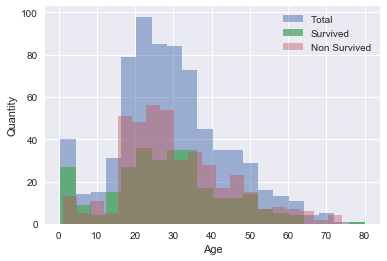

In [57]:
#draw a histogram of each feature
train_titanic['Age'].hist(bins = 20, alpha = 0.5, label = "Total")
train_titanic['Age'][train_titanic['Survived']==1].hist(bins = 20,alpha = 0.8, label = "Survived")
train_titanic['Age'][train_titanic['Survived']==0].hist(bins = 20,alpha = 0.4, label = "Non Survived")

plt.xlabel("Age")
plt.ylabel("Quantity")
plt.legend(loc = "upper right")

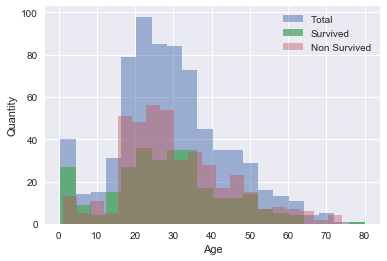

In [60]:
#drop nan

train_titanic['Age'].dropna().hist(bins = 20, alpha = 0.5, label = "Total")
train_titanic['Age'][train_titanic['Survived']==1].dropna().hist(bins = 20,alpha = 0.8, label = "Survived")
train_titanic['Age'][train_titanic['Survived']==0].dropna().hist(bins = 20,alpha = 0.4, label = "Non Survived")

plt.xlabel("Age")
plt.ylabel("Quantity")
plt.legend(loc = "upper right")

In [67]:
#change char into int of Sex

#when adding a new variable, better to fill them with some value before changing others in it. 
#Because, there might be NaN generated/kept, we don't want NaN in new variable

#but before creating new variable, better to deal with NaN first
train_titanic['Gender'] = 10
train_titanic['Gender'] = train_titanic['Sex'].map({'female':0, 'male':1}).astype(int)

In [68]:
#check embarked
print(train_titanic['Embarked'].value_counts(), train_titanic['Embarked'].unique())
train_titanic['Origin'] = 10
train_titanic['Origin'] = train_titanic['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

S    644
C    168
Q     77
Name: Embarked, dtype: int64 ['S' 'C' 'Q' nan]


ValueError: Cannot convert non-finite values (NA or inf) to integer